# Predicting diabetes 

## import librairies

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#does ploting inline
%matplotlib inline

# Load and preview Data

In [13]:
df = pd.read_csv("./Downloads/MachineLearningWithPython-master/Notebooks/data/pima-data.csv")

In [15]:
df.shape

(768, 10)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [17]:
df.tail(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [18]:
df.columns

Index(['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin', 'diabetes'],
      dtype='object')

In [24]:
df.isnull().values.any()

False

In [28]:
def plot_corr(df, size=11):
    corr = df.corr() #correlation function
    fig ,ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    

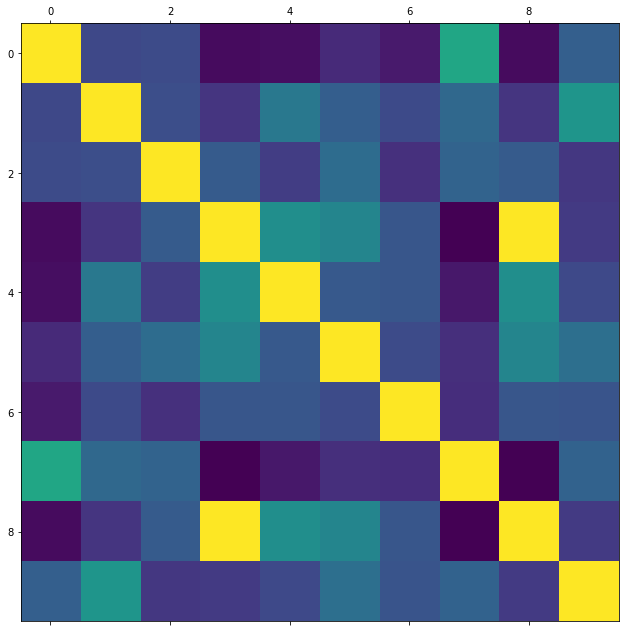

In [30]:
plot_corr(df) 

In [35]:
del df["skin"]

In [37]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


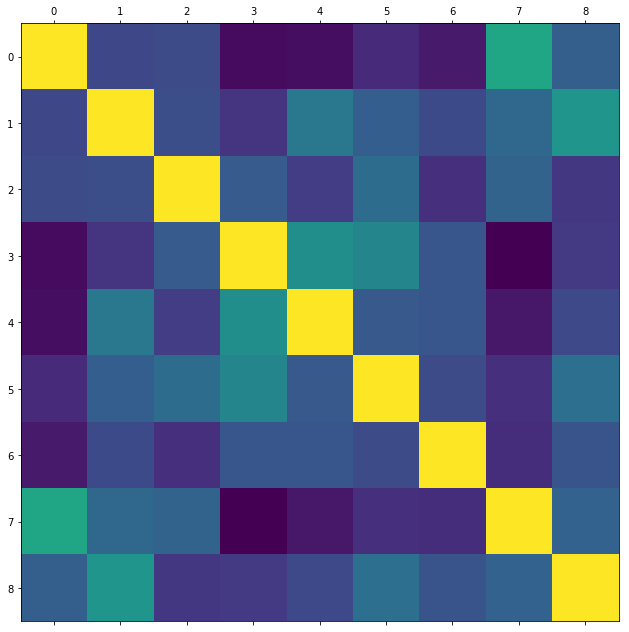

In [38]:
plot_corr(df) 


# Check data types


In [39]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


Change True to 1, False to 0

In [40]:
dic = {True: 1 , False: 0}

In [41]:
df['diabetes'] = df['diabetes'].map(dic) 
# .map(subtition) is used to access a column and change its content

In [42]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [73]:
num_true = len (df.loc[df['diabetes'] == 1]) 
num_false = len (df.loc[df['diabetes'] == 0])

In [75]:
# {}.format(value) allows
print("here is the outcome for existing diabetes: {0} , ({1:2.2f}%) " .format(num_true, (num_true/ (num_true+num_false)) * 100))
print("here is the outcome for its non existence: {0} , ({1:2.2f}%) " .format(num_false, (num_false/ (num_true+num_false)) * 100))


here is the outcome for existing diabetes: 268 , (34.90%) 
here is the outcome for its non existence: 500 , (65.10%) 


Good Distribution

### Splitting Data

70% for training, 30% for testing

In [80]:
from sklearn.model_selection import train_test_split

feature_col_name =['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin','bmi', 'diab_pred', 'age']
predicted_class_names=[ 'diabetes']

X=df[feature_col_name].values #features 
y=df[predicted_class_names].values #predicted values (0 or 1)
split_test_size=0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42 )

In [88]:
print("the traing values represent {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("the test ones represent {0:0.2f}%".format(len(X_test)/len(df.index)*100))

the traing values represent 69.92%
the test ones represent 30.08%


In [89]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))



Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


### Post-Split Data Preparation

#### Checking for missing values

In [92]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


#### Impute with the mean

In [93]:
from sklearn.impute import SimpleImputer


fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

## Training Initial Algorithm - Naive Bayes

In [94]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

### Performance on Training Data

In [100]:
# predict values using the training data
nb_predict_train = nb_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

Accuracy: 0.7542



### Performance on Testing Data

In [101]:
# predict values using the testing data
nb_predict_test = nb_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, nb_predict_test)))
print()

Accuracy: 0.7359



In [102]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, nb_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))



Confusion Matrix
[[118  33]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       151
           1       0.61      0.65      0.63        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.71      0.72      0.71       231
weighted avg       0.74      0.74      0.74       231



## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

# create Gaussian Naive Bayes model object and train it with the data
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train.ravel())

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [108]:
# predict values using the testing data
rf_predict_test = rf_model.predict(X_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rf_predict_test)))
print()

Accuracy: 0.9870



In [109]:
# predict values using the testing data
rf_predict_test = rf_model.predict(X_test)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rf_predict_test)))
print()

Accuracy: 0.7100



In [110]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rf_predict_test)))
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))



Confusion Matrix
[[121  30]
 [ 37  43]]

Classification Report
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       151
           1       0.59      0.54      0.56        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.71       231



## Logistic Regression

In [111]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=42, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7446
[[128  23]
 [ 36  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       151
           1       0.66      0.55      0.60        80

   micro avg       0.74      0.74      0.74       231
   macro avg       0.72      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



1st max value of 0.613 occured at C=1.400


Text(0, 0.5, 'recall score')

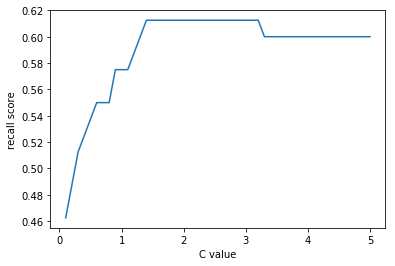

In [112]:
#regularization parameter
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=42, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



1st max value of 0.738 occured at C=0.300


Text(0, 0.5, 'recall score')

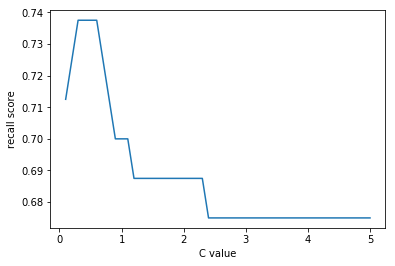

In [113]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=10000)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline 
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

In [114]:
from sklearn.linear_model import LogisticRegression
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=42, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7143
[[106  45]
 [ 21  59]]

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.70      0.76       151
           1       0.57      0.74      0.64        80

   micro avg       0.71      0.71      0.71       231
   macro avg       0.70      0.72      0.70       231
weighted avg       0.74      0.71      0.72       231

0.7375


### LogisticRegressionCV


In [115]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=42, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel())

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=500,
           multi_class='warn', n_jobs=-1, penalty='l2', random_state=42,
           refit=False, scoring=None, solver='lbfgs', tol=0.0001,
           verbose=0)

### Predict on Test data


In [116]:
 lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.6883
[[107  44]
 [ 28  52]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       151
           1       0.54      0.65      0.59        80

   micro avg       0.69      0.69      0.69       231
   macro avg       0.67      0.68      0.67       231
weighted avg       0.71      0.69      0.69       231



# Using your trained Model

In [117]:
from sklearn.externals import joblib  
joblib.dump(lr_cv_model, "./documents/ml/pima-trained-model.pkl")



['./documents/ml/pima-trained-model.pkl']

In [118]:
#loading model
lr_cv_model = joblib.load("./documents/ml/pima-trained-model.pkl")


# get data from truncated pima data file
df_predict = pd.read_csv("./Downloads/MachineLearningWithPython-master/Notebooks/data/pima-data-trunc.csv")
print(df_predict.shape)



(4, 10)


In [120]:
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,1,89,66,23,94,28.1,0.167,21,0.9062,False
1,2,197,70,45,543,30.5,0.158,53,1.7730,True
2,7,100,0,0,0,30.0,0.484,32,0.0000,True
3,1,103,30,38,83,43.3,0.183,33,1.4972,False


The truncated file contained 4 rows from the original CSV.

Data is the same is in same format as the original CSV file's data. Therefore, just like the original data, we need to transform it before we can make predictions on the data.

Note: If the data had been previously "cleaned up" this would not be necessary.

We do this by executed the same transformations as we did to the original data

Start by dropping the "skin" which is the same as thickness, with different units.

In [121]:
del df_predict['skin']
df_predict

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,1,89,66,23,94,28.1,0.167,21,False
1,2,197,70,45,543,30.5,0.158,53,True
2,7,100,0,0,0,30.0,0.484,32,True
3,1,103,30,38,83,43.3,0.183,33,False


In [122]:
X_predict = df_predict
del X_predict['diabetes']

#Impute with mean all 0 readings
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy="mean") #, axis=0)
X_predict = fill_0.fit_transform(X_predict)



In [123]:
lr_cv_model.predict(X_predict)

array([0, 1, 0, 0])